In [80]:
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.io.shapereader as shpreader
import cartopy.io.img_tiles as cimgt
import matplotlib.pyplot as plt
import cartopy.mpl.geoaxes
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
%matplotlib inline
import numpy as np
from vega_datasets import data as vds
from  matplotlib_scalebar.scalebar  import  ScaleBar
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar

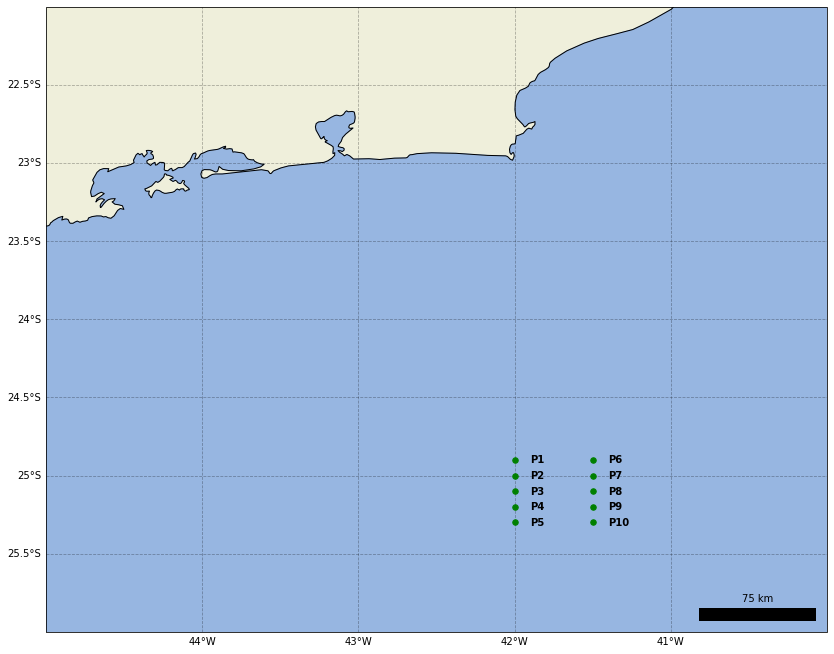

In [81]:
import pandas as pd
fig = plt.figure(figsize=(14,14))

p1 = dict(lon=-41.50702778, lat=-23.7445)
p2 = dict(lon=-41.51047222, lat=-23.83372222)
p3 = dict(lon=-40.98363889, lat=-24.64708333)
p4 = dict(lon=-42.43777778, lat=-26.46388889)
p5 = dict(lon=-45.40833333, lat=-26.89722222)
p6 = dict(lon=-47.02161111, lat=-27.37619444)
p7 = dict(lon=-47.24541667, lat=-27.38052778)
p8 = dict(lon=-47.25961111, lat=-26.75458333)
p9 = dict(lon=-45.74630556, lat=-24.87233333)
p10 = dict(lon=-45.38813889, lat=-24.62844444)
p11 = dict(lon=-44.13344444, lat=-24.02961111)
p12 = dict(lon=-42.49669444, lat=-23.75022222)
p13 = dict(lon=-41.50702778, lat=-23.7445)


m1 = fig.add_subplot(111, projection=ccrs.PlateCarree())

m1.coastlines()
m1.add_feature(cfeature.LAND)
m1.add_feature(cfeature.OCEAN)
m1.add_feature(cfeature.COASTLINE,linewidth=0.01)
g1 = m1.gridlines(crs=ccrs.PlateCarree(),
                          draw_labels=True,
                          color='black',
                          linestyle='--',
                          alpha=0.3)
g1.xlabels_top = False
g1.ylabels_right = False


m1.set_extent([-45, -40, -26, -22], ccrs.PlateCarree())
stamen_terrain = cimgt.Stamen('terrain-background')

Scalebar = ScaleBar(100, "km", length_fraction=0.18, 
                    width_fraction=0.020, location= 'lower right',
                    pad= 1, scale_loc='top', box_color='None')
scale_formatter = lambda value, unit: f"{value} {unit}"
m1.add_artist(Scalebar)

df = pd.read_excel('C:/Users/Jonat/Downloads/Coordenada_Campanha12.xlsx')
df.head()
plt1 = m1.scatter(df.Longitude, df.Latitude, s=30, color='green', zorder=10, transform=ccrs.PlateCarree())
#m1.add_image(stamen_terrain, 8)


for i in df.index:
    m1.text(df.Longitude.iloc[i] + .10, df.Latitude.iloc[i] +.0, df.Ponto.iloc[i],va='center', 
            ha='left', transform=ccrs.PlateCarree(), fontweight='bold')

plt.show()
 

In [82]:
import shapefile
myshp = open("C:/Users/Jonat/Desktop/RJ/Limite_de_Bairros.shp", "rb")
mydbf = open("C:/Users/Jonat/Desktop/RJ/Limite_de_Bairros.dbf", "rb")
r = shapefile.Reader(shp=myshp, dbf=mydbf)

In [83]:
sf = shapefile.Reader("C:/Users/Jonat/Desktop/rio/Limite_do_Munic%C3%ADpio_do_Rio_de_Janeiro.shp")

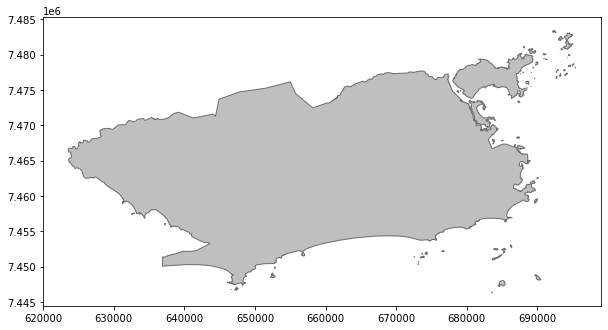

In [84]:
from descartes import PolygonPatch
poly=sf.shape().__geo_interface__
fig = plt.figure(figsize=(10,10))
ax = fig.gca() 
ax.add_patch(PolygonPatch(poly, fc='grey', alpha=0.5, zorder=2))
ax.axis('Scaled')
plt.show()

In [85]:
import json

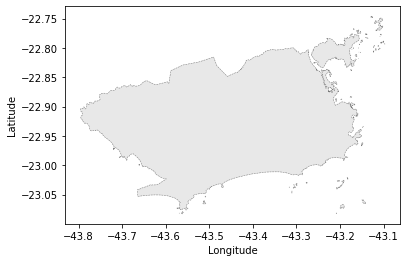

In [86]:
data = json.load(open("C:/Users/Jonat/Desktop/rio/Limite_do_Munic%C3%ADpio_do_Rio_de_Janeiro.geojson"))
fig = plt.figure() # create a figure to contain the plot elements
ax = fig.gca(xlabel="Longitude", ylabel="Latitude")
from shapely.geometry import asShape # manipulating geometry
from descartes import PolygonPatch 

for feat in data["features"]:
    # convert the geometry to shapely
    geom = asShape(feat["geometry"])
    # obtain the coordinates of the feature's centroid
    x, y = geom.centroid.x, geom.centroid.y
    # plot the centroids
    ax.plot(x, y)
    # label the features at the centroid location
    #ax.text(x, y, feat["properties"]["ward"], fontsize=6, bbox = dict(fc='w',
            #alpha=0.3))
    # plot the polygon features: type help(PolygonPatch) for more args
    ax.add_patch(PolygonPatch(feat["geometry"], fc='lightgrey', ec='black',
                alpha=0.5, lw=0.5, ls='--', zorder=2))
    #ax.set_xlim(-43.25, -43.17)
    #ax.set_ylim(-23.4, -22.9)
            

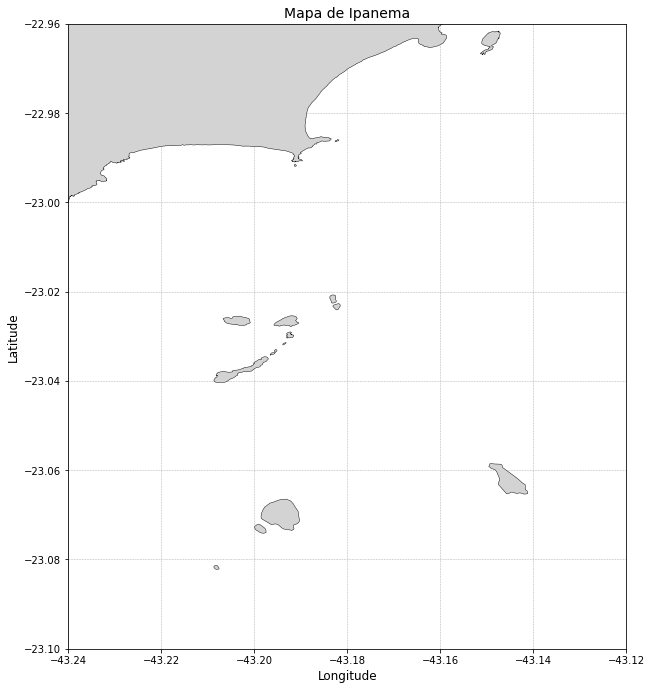

In [134]:
data = json.load(open("C:/Users/Jonat/Desktop/rio/Limite_do_Munic%C3%ADpio_do_Rio_de_Janeiro.geojson"))
fig = plt.figure(figsize=(10,11.5)) # create a figure to contain the plot elements
ax = fig.add_subplot(111)

from shapely.geometry import asShape # manipulating geometry
from descartes import PolygonPatch 
ax.set_xlim(-43.24, -43.12) # 0.12
ax.set_ylim(-23.1, -22.96) # 0.15
ax.set_title('Mapa de Ipanema', fontsize=14)
ax.set_ylabel('Latitude',fontsize=12)
ax.set_xlabel('Longitude', fontsize=12)
plt.grid(linewidth=0.5, linestyle='--')
ax.set_yticks(np.arange(-23.10,-22.96,0.02))


for feat in data["features"]:
    # convert the geometry to shapely
    geom = asShape(feat["geometry"])
    ax.add_patch(PolygonPatch(feat["geometry"], fc='lightgrey', ec='black',
                alpha=1, lw=0.45, ls='-', zorder=2))



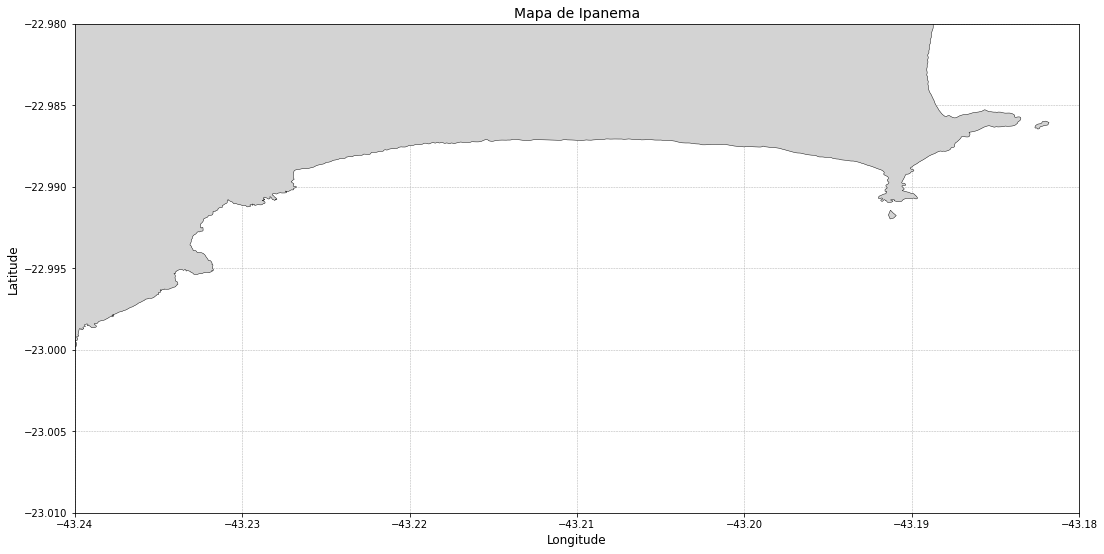

In [162]:
data = json.load(open("C:/Users/Jonat/Desktop/rio/Limite_do_Munic%C3%ADpio_do_Rio_de_Janeiro.geojson"))
fig = plt.figure(figsize=(18,9)) # create a figure to contain the plot elements
ax = fig.add_subplot(111)

from shapely.geometry import asShape # manipulating geometry
from descartes import PolygonPatch 
ax.set_xlim(-43.24, -43.18) # 0.6
ax.set_ylim(-23.01, -22.98) # 0.3
ax.set_title('Mapa de Ipanema', fontsize=14)
ax.set_ylabel('Latitude',fontsize=12)
ax.set_xlabel('Longitude', fontsize=12)
plt.grid(linewidth=0.5, linestyle='--')
ax.set_yticks(np.arange(-23.01,-22.98,0.005))





for feat in data["features"]:
    # convert the geometry to shapely
    geom = asShape(feat["geometry"])
    ax.add_patch(PolygonPatch(feat["geometry"], fc='lightgrey', ec='black',
                alpha=1, lw=0.45, ls='-', zorder=2))
    

    